
0: 448x640 1 ucho_salky, 7.7ms
Speed: 3.1ms preprocess, 7.7ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)
Detected 1 objects.
Detected ucho_salky with confidence 0.84 at [3269.2978515625, 2038.2716064453125, 4079.54052734375, 3331.630126953125]


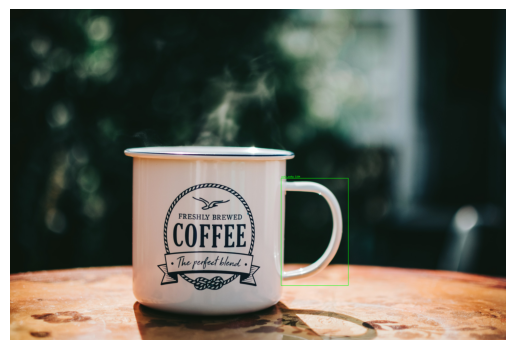

In [25]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

# Load the trained model
model = YOLO('/home/adambucko/workspace/hns/zadanie1_pismenka/runs/detect/train39/weights/best.pt')

def visualize_detection(image_path):
    # Load image in BGR format
    image = cv2.imread(image_path)

    # Perform inference
    results = model(image)

    # Extract bounding boxes, classes, names, and confidences
    boxes = results[0].boxes.xyxy.tolist()
    classes = results[0].boxes.cls.tolist()
    names = results[0].names
    confidences = results[0].boxes.conf.tolist()

    print(f"Detected {len(boxes)} objects.")

    # Draw bounding boxes and labels on the image in BGR format
    for box, cls, conf in zip(boxes, classes, confidences):
        x1, y1, x2, y2 = box
        label = names[int(cls)]
        print(f"Detected {label} with confidence {conf:.2f} at [{x1}, {y1}, {x2}, {y2}]")
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 3) # Changed color and thickness
        cv2.putText(image, f'{label} {conf:.2f}', (int(x1), int(y1-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Convert image to RGB for display using Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


# Test the function with a test image
test_image_path = '/mnt/c/Users/bucko/Desktop/test_photo.jpg'


if not os.path.exists(test_image_path):
    print(f"File not found: {test_image_path}")
else:
    visualize_detection(test_image_path)


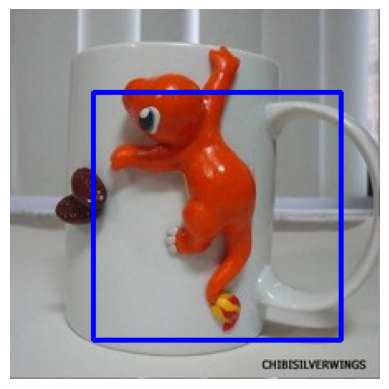

In [24]:
import cv2
import matplotlib.pyplot as plt

# Test image
image = cv2.imread('/home/adambucko/workspace/hns/zadanie1_pismenka/Zadanie_1/datasets/dataset/train/images/cup(17).jpg')
cv2.rectangle(image, (50, 50), (200, 200), (255, 0, 0), 2)

# Convert to RGB and display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()